In [1]:
import numpy as np
from scipy.stats import ks_2samp
from scipy import stats
import matplotlib.pyplot as plt
import h5py
import time
import illustris_python_mod as il
import sys
import os
sys.path.append('../BH_dynamics_analysis')
sys.path.append('/home/pranavsatheesh/arepo_package/')
import arepo_package as arepo
from scipy.spatial import cKDTree
import BRAHMA_python as il_brahma
from tqdm import tqdm
import datetime
from scipy.spatial import cKDTree
from scipy.stats import ks_2samp

In [2]:
tex_path = '/apps/texlive/2023/bin/x86_64-linux/'
os.environ['PATH'] += os.pathsep + tex_path
import scienceplots
plt.style.use('science')
sys.path.append('../py_files/')
import control_sample as control

In [3]:
pop_file_path = '/home/pranavsatheesh/host_galaxies/data/population_files/' 
basePath="/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_DFD_3/"
simName = basePath.split('/')[-2]
h = il.groupcat.loadHeader(basePath,0)['HubbleParam']

In [4]:
boxlength = il_brahma.groupcat.loadHeader(basePath,0)['BoxSize'] #in ckpc/h

In [11]:
#loading brahma mergers
brahma_pop_Nstar10 = control.load_pop_file(basePath,pop_file_path,[0,0,10,0])
brahma_pop_Nstar10_bh1 = control.load_pop_file(basePath,pop_file_path,[0,0,10,1])

#loading TNG mergers
pop_file_loc = "/home/pranavsatheesh/host_galaxies/data/population_files/new/"
#pop_file = pop_file_loc + "population_sort_gas-100_dm-100_star-100_bh-001_w_rsep_cut_1bh.hdf5"
pop_file_1000_1bh = pop_file_loc + "population_sort_gas-000_dm-000_star-1000_bh-000_w_rsep_cut_1bh.hdf5"
# pop_file = pop_file_loc + "population_sort_gas-100_dm-100_star-100_bh-001_w_rsep_cut.hdf5"
pop_file_1000_0bh = pop_file_loc + "population_sort_gas-000_dm-000_star-1000_bh-001_w_rsep_cut_1bh.hdf5"
#pop_100 = h5py.File(pop_file_100, 'r')
#pop_1000 = h5py.File(pop_file_1000, 'r')

TNG50_pop_Nstar1000_0bh = h5py.File(pop_file_1000_0bh,'r')
TNG50_pop_Nstar1000_1bh = h5py.File(pop_file_1000_1bh,'r')

NameError: name 'TNG50_pop_Nstar1000' is not defined

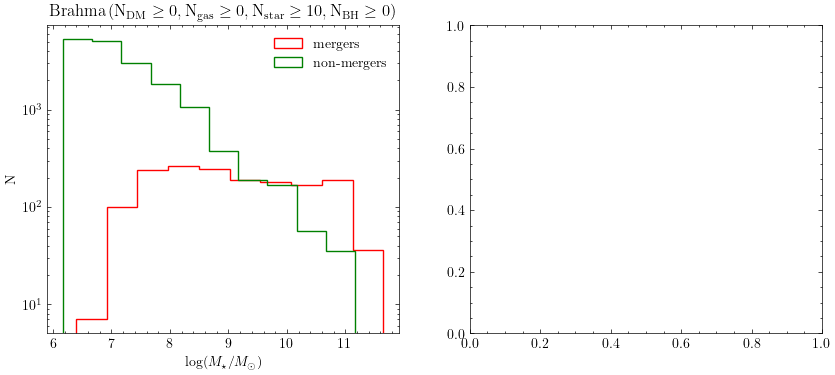

In [12]:
fig,axes = plt.subplots(1,2,figsize=(10,4))
axes[0].hist(np.log10(brahma_pop_Nstar10['merging_population']['Mstar']),bins=10,histtype='step',label='mergers',color='red')
axes[0].hist(np.log10(brahma_pop_Nstar10['non_merging_population']['Mstar']),bins=10,histtype='step',label='non-mergers',color='green')
axes[0].set_yscale('log')
axes[0].legend()
axes[0].set_xlabel(r'$\log(M_{\star}/M_{\odot})$')
axes[0].set_ylabel('N')
axes[0].set_title(r'$\rm Brahma \, (N_{DM} \geq 0, N_{gas} \geq 0, N_{star} \geq 10, N_{BH} \geq 0)$')


axes[1].hist(np.log10(TNG50_pop_Nstar1000['merging_population']['Mstar']),bins=10,histtype='step',label='mergers',color='red')
axes[1].hist(np.log10(TNG50_pop_Nstar1000['non_merging_population']['Mstar']),bins=10,histtype='step',label='non-mergers',color='green')
axes[1].set_yscale('log')
axes[1].legend()
axes[1].set_xlabel(r'$\log(M_{\star}/M_{\odot})$')
axes[1].set_ylabel('N')
axes[1].set_title(r'$\rm TNG50 \, (N_{DM} \geq 0, N_{gas} \geq 0, N_{star} \geq 1000, N_{BH} \geq 0)$')
fig.tight_layout()

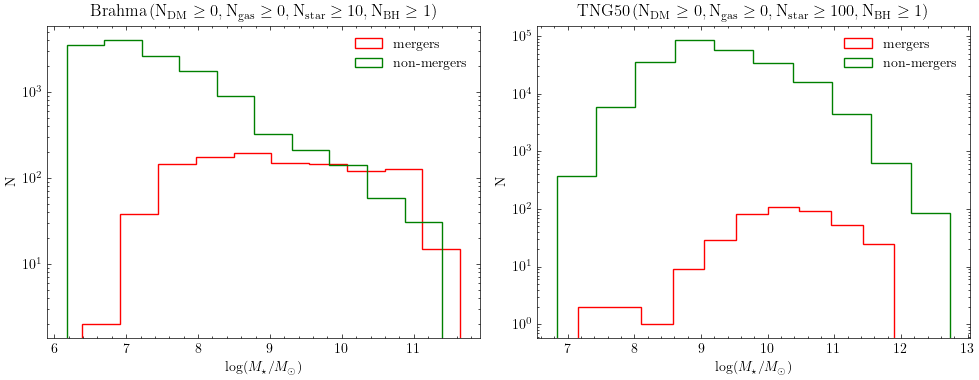

In [13]:
fig,axes = plt.subplots(1,2,figsize=(10,4))
axes[0].hist(np.log10(brahma_pop_Nstar10_bh1['merging_population']['Mstar']),bins=10,histtype='step',label='mergers',color='red')
axes[0].hist(np.log10(brahma_pop_Nstar10_bh1['non_merging_population']['Mstar']),bins=10,histtype='step',label='non-mergers',color='green')
axes[0].set_yscale('log')
axes[0].legend()
axes[0].set_xlabel(r'$\log(M_{\star}/M_{\odot})$')
axes[0].set_ylabel('N')
axes[0].set_title(r'$\rm Brahma \, (N_{DM} \geq 0, N_{gas} \geq 0, N_{star} \geq 10, N_{BH} \geq 1)$')

axes[1].hist(np.log10(TNG50_pop_Nstar100['merging_population']['Mstar']),bins=10,histtype='step',label='mergers',color='red')
axes[1].hist(np.log10(TNG50_pop_Nstar100['non_merging_population']['Mstar']),bins=10,histtype='step',label='non-mergers',color='green')
axes[1].set_yscale('log')
axes[1].legend()
axes[1].set_xlabel(r'$\log(M_{\star}/M_{\odot})$')
axes[1].set_ylabel('N')
axes[1].set_title(r'$\rm TNG50 \, (N_{DM} \geq 0, N_{gas} \geq 0, N_{star} \geq 100, N_{BH} \geq 1)$')
fig.tight_layout()

In [14]:
merger_file_loc = '/home/pranavsatheesh/host_galaxies/data/merger_files/'
merger_prop = np.load(merger_file_loc + 'brahma_merger_file_output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_DFD_3.npy',allow_pickle=True).item()

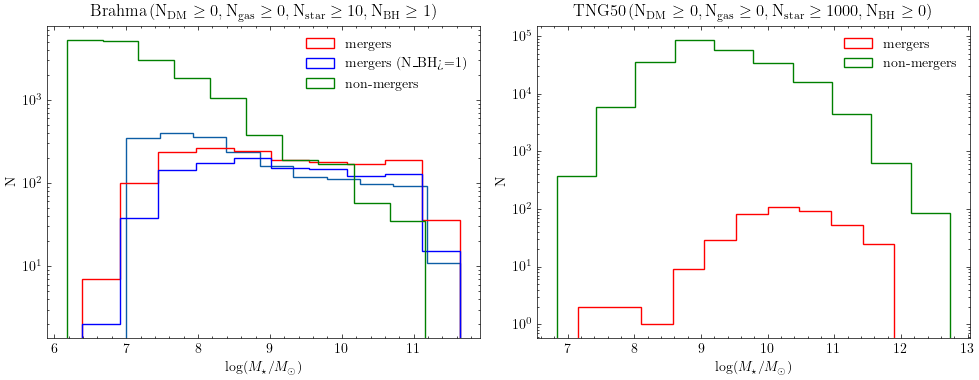

In [15]:
fig,axes = plt.subplots(1,2,figsize=(10,4))

axes[0].hist(np.log10(merger_prop['remnant_SubhaloStellarMass'][merger_prop['remnant_SubhaloStellarMass']*1e10/h>=1e7]*1e10/h),histtype='step',bins=10)
axes[0].hist(np.log10(brahma_pop_Nstar10['merging_population']['Mstar']),bins=10,histtype='step',label='mergers',color='red')
axes[0].hist(np.log10(brahma_pop_Nstar10_bh1['merging_population']['Mstar']),bins=10,histtype='step',label='mergers (N_BH>=1)',color='blue')
axes[0].hist(np.log10(brahma_pop_Nstar10['non_merging_population']['Mstar']),bins=10,histtype='step',label='non-mergers',color='green')
axes[0].set_yscale('log')
axes[0].legend()
axes[0].set_xlabel(r'$\log(M_{\star}/M_{\odot})$')
axes[0].set_ylabel('N')
axes[0].set_title(r'$\rm Brahma \, (N_{DM} \geq 0, N_{gas} \geq 0, N_{star} \geq 10, N_{BH} \geq 1)$')


axes[1].hist(np.log10(TNG50_pop_Nstar100['merging_population']['Mstar']),bins=10,histtype='step',label='mergers',color='red')
axes[1].hist(np.log10(TNG50_pop_Nstar100['non_merging_population']['Mstar']),bins=10,histtype='step',label='non-mergers',color='green')
axes[1].set_yscale('log')
axes[1].legend()
axes[1].set_xlabel(r'$\log(M_{\star}/M_{\odot})$')
axes[1].set_ylabel('N')
axes[1].set_title(r'$\rm TNG50 \, (N_{DM} \geq 0, N_{gas} \geq 0, N_{star} \geq 1000, N_{BH} \geq 0)$')
fig.tight_layout()

### Comparing the BH merger file to the galaxy merger file

In [16]:
merger_prop.keys()

dict_keys(['merger_redshift', 'remnant_redshift', 'BH_ID1', 'BH_ID2', 'BH_Mass1', 'BH_Mass2', 'remnant_SubhaloID', 'remnant_SubhaloDarkMatterMass', 'remnant_SubhaloStellarMass', 'remnant_SubhaloHalfMassRadii', 'remnant_central_or_satellite', 'merger_type'])

In [17]:
unique_zs = np.unique(brahma_pop_Nstar10_bh1['merging_population']['z'][:])

In [18]:
unique_zs[0]

2.220446049250313e-16

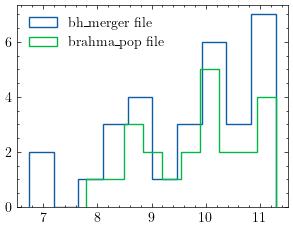

In [19]:
plt.hist(np.log10(merger_prop['remnant_SubhaloStellarMass'][merger_prop['remnant_redshift']==unique_zs[4] ]*1e10/h),histtype='step',bins=10,label='bh_merger file')
plt.hist(np.log10(brahma_pop_Nstar10_bh1['merging_population']['Mstar'][brahma_pop_Nstar10_bh1['merging_population']['z']==unique_zs[4]]),histtype='step',bins=10,label='brahma_pop file')
plt.legend()

There are more BH mergers in the merger file than the population files

#### Check rsep in the non-mergers!

In [20]:
brahma_pop_Nstar10_bh1['merging_population'].keys()

<KeysViewHDF5 ['MBH', 'Mdot', 'Mgas', 'Mgas-half', 'Mstar', 'Mstar-half', 'Msubhalo', 'SFR', 'snap', 'subhalo_ids', 'z']>

In [21]:
brahma_pop_Nstar10_bh1['non_merging_population']['snap'][:]

array([17., 17., 17., ..., 32., 32., 32.])

In [22]:

def find_rseps(snap_num):
    last_snap_flag = brahma_pop_Nstar10_bh1['merging_population']['snap'][:]==snap_num
    subhalos = il_brahma.groupcat.loadSubhalos(
                basePath,snap_num, 
                fields=['SubhaloLenType', 'SubhaloMassType', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloSFR','SubhaloGasMetallicity','SubhaloStarMetallicity','SubhaloPos','SubhaloHalfmassRadType']
            )
    valid_non_merging_subhalos = brahma_pop_Nstar10_bh1['merging_population']['subhalo_ids'][last_snap_flag].astype(int)
    valid_subhalo_pos = subhalos['SubhaloPos'][valid_non_merging_subhalos] #in ckpc/h
    tree = cKDTree(valid_subhalo_pos,boxsize=boxlength)
    distances, nearest_neighbors = tree.query(valid_subhalo_pos,k=2)
    nearest_subhalo_ids = nearest_neighbors[:,-1]
    r_subhalos = distances[:,-1] #in ckpc/h
    stellar_half_mass_radius = subhalos['SubhaloHalfmassRadType'][:,4][valid_non_merging_subhalos]
    r_seps = r_subhalos/(stellar_half_mass_radius+stellar_half_mass_radius[nearest_subhalo_ids])

    print(r_seps)
    print(np.min(r_seps))

    return r_seps

In [23]:
last_snap_flag = brahma_pop_Nstar10_bh1['non_merging_population']['snap'][:]==32

In [24]:
subhalos = il_brahma.groupcat.loadSubhalos(
                basePath,32, 
                fields=['SubhaloLenType', 'SubhaloMassType', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloSFR','SubhaloGasMetallicity','SubhaloStarMetallicity','SubhaloPos','SubhaloHalfmassRadType']
            )

In [25]:
valid_non_merging_subhalos = brahma_pop_Nstar10_bh1['non_merging_population']['subhalo_ids'][last_snap_flag].astype(int)

In [26]:
valid_subhalo_pos = subhalos['SubhaloPos'][valid_non_merging_subhalos]

In [27]:
tree = cKDTree(valid_subhalo_pos,boxsize=boxlength)

In [28]:
distances, nearest_neighbors = tree.query(valid_subhalo_pos,k=2)
nearest_subhalo_ids = nearest_neighbors[:,-1]
r_subhalos = distances[:,-1] #in ckpc

In [29]:
stellar_half_mass_radius = subhalos['SubhaloHalfmassRadType'][:,4][valid_non_merging_subhalos]

In [30]:
r_seps = r_subhalos/(stellar_half_mass_radius+stellar_half_mass_radius[nearest_subhalo_ids])

/tmp/ipykernel_732611/2654207355.py:1: RuntimeWarning: divide by zero encountered in divide
  r_seps = r_subhalos/(stellar_half_mass_radius+stellar_half_mass_radius[nearest_subhalo_ids])


In [31]:
np.min(r_seps)

3.335400116411282

## A stricter control selection

In [86]:
brahma_pop_Nstar10_bh1['merging_population'].keys()

<KeysViewHDF5 ['MBH', 'Mdot', 'Mgas', 'Mgas-half', 'Mstar', 'Mstar-half', 'Msubhalo', 'SFR', 'snap', 'subhalo_ids', 'z']>

In [93]:
non_merging_pop_Mstar = brahma_pop_Nstar10_bh1['non_merging_population']['Mstar'][:]
merging_pop_Mstar = brahma_pop_Nstar10_bh1['merging_population']['Mstar'][:]
all_mrgr_z = np.unique(brahma_pop_Nstar10_bh1['merging_population']['z'][:])


In [118]:
used = np.zeros(len(non_merging_pop_Mstar),dtype=bool)
merger_control_index_pairs = []

zi_merger_ix = np.where(brahma_pop_Nstar10_bh1['merging_population']['z']==all_mrgr_z[0])[0]
zi_nonmrgr_ix = np.where(brahma_pop_Nstar10_bh1['non_merging_population']['z']==all_mrgr_z[0])[0]
zi_nonmerger_ix = zi_nonmrgr_ix[used[zi_nonmrgr_ix]==False]

merger_Mstars=brahma_pop_Nstar10_bh1['merging_population']['Mstar'][zi_merger_ix]
nonmerger_Mstars=brahma_pop_Nstar10_bh1['non_merging_population']['Mstar'][zi_nonmerger_ix]

for Mstar_merger_i in merger_Mstars:
    closest_non_merger_ix = np.argmin(np.abs(nonmerger_Mstars - Mstar_merger_i))
    mass_diff = np.abs(np.log(nonmerger_Mstars[closest_non_merger_ix]) - np.log(Mstar_merger_i))

    if mass_diff < 0.1:
        print(mass_diff,np.log10(Mstar_merger_i),np.log10(nonmerger_Mstars[closest_non_merger_ix]))

        merger_index = np.where(merging_pop_Mstar==Mstar_merger_i)[0][0]
        non_merger_index = np.where(non_merging_pop_Mstar==nonmerger_Mstars[closest_non_merger_ix])[0][0]

        print(merger_index,non_merger_index)
        print(np.log10(brahma_pop_Nstar10_bh1['merging_population']['Mstar'][merger_index]),np.log10(brahma_pop_Nstar10_bh1['non_merging_population']['Mstar'][non_merger_index]))
        merger_control_index_pairs.append((merger_index,non_merger_index))
        used[non_merger_index] = True
    else:
        merger_control_index_pairs.append((merger_index,-1))

0.014223424633588166 11.083934342683706 11.090111497515842
1110 12983
11.083934342683706 11.090111497515842
0.023765058676815443 10.342128926752494 10.331807892907047
1112 12992
10.342128926752494 10.331807892907047
0.013790121032439373 9.666749834429655 9.66076086096049
1113 13155
9.666749834429655 9.66076086096049
0.027771521608890737 10.148904431942839 10.160965450531638
1114 13118
10.148904431942839 10.160965450531638
0.009342480116654173 9.814657201829576 9.81059981426762
1115 13113
9.814657201829576 9.81059981426762
0.01452692204820849 9.290228941102988 9.296537903187563
1116 13164
9.290228941102988 9.296537903187563
0.005909874191033282 9.11730139411694 9.119868019866848
1117 13204
9.11730139411694 9.119868019866848
0.035264830192236474 9.18182695001568 9.166511628857936
1118 13116
9.18182695001568 9.166511628857936
0.0008290756882942674 9.383099070355078 9.382739007358571
1119 13146
9.383099070355078 9.382739007358571
0.0007244601811144946 9.010540533056517 9.010855162115535
11

In [145]:
used = np.zeros(len(non_merging_pop_Mstar),dtype=bool)
merger_control_index_pairs = []


for z_i in tqdm(all_mrgr_z,"processing"):
    zi_merger_ix = np.where(brahma_pop_Nstar10_bh1['merging_population']['z']==z_i)[0]
    zi_nonmrgr_ix = np.where(brahma_pop_Nstar10_bh1['non_merging_population']['z']==z_i)[0]
    zi_nonmerger_ix = zi_nonmrgr_ix[used[zi_nonmrgr_ix]==False]

    merger_Mstars=brahma_pop_Nstar10_bh1['merging_population']['Mstar'][zi_merger_ix]
    nonmerger_Mstars=brahma_pop_Nstar10_bh1['non_merging_population']['Mstar'][zi_nonmerger_ix]

    for Mstar_merger_i in merger_Mstars:
        closest_non_merger_ix = np.argmin(np.abs(nonmerger_Mstars - Mstar_merger_i))
        mass_diff = np.abs(np.log(nonmerger_Mstars[closest_non_merger_ix]) - np.log(Mstar_merger_i))

        if mass_diff < 0.1:
            #print(mass_diff,np.log10(Mstar_merger_i),np.log10(nonmerger_Mstars[closest_non_merger_ix]))

            merger_index = np.where(merging_pop_Mstar==Mstar_merger_i)[0][0]
            non_merger_index = np.where(non_merging_pop_Mstar==nonmerger_Mstars[closest_non_merger_ix])[0][0]

            # print(merger_index,non_merger_index)
            # print(np.log10(brahma_pop_Nstar10_bh1['merging_population']['Mstar'][merger_index]),np.log10(brahma_pop_Nstar10_bh1['non_merging_population']['Mstar'][non_merger_index]))
            merger_control_index_pairs.append([merger_index,non_merger_index])
            used[non_merger_index] = True
        else:
            merger_control_index_pairs.append([merger_index,-1])

processing: 100%|██████████| 16/16 [00:00<00:00, 527.66it/s]


In [146]:
print("Number of cases where a close enough match is not found wit" \
"hin the acceptable tolerance:",len(np.argwhere(np.array(merger_control_index_pairs)[:,-1] == -1)))

Number of cases where a close enough match is not found within the acceptable tolerance: 341


In [157]:
merger_indices_w_no_control = np.array(merger_control_index_pairs)[:,0][np.argwhere(np.array(merger_control_index_pairs)[:,-1] == -1)]

Text(0.5, 0.98, 'Cases where a good control not found')

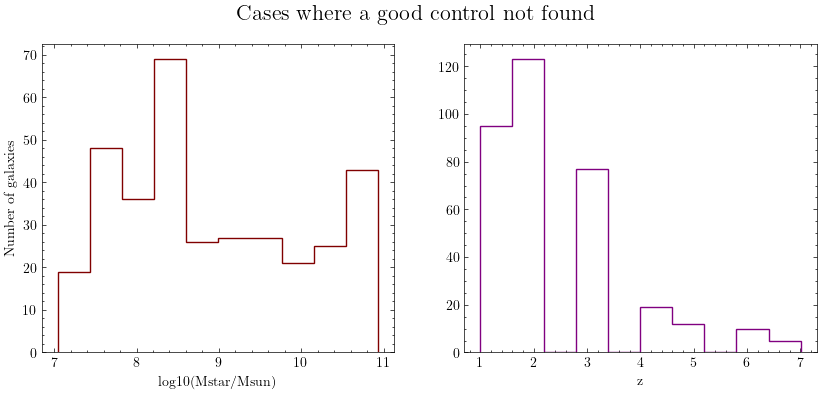

In [161]:
fig,axes = plt.subplots(1,2,figsize=[10,4])
axes[0].hist(np.log10(brahma_pop_Nstar10['merging_population']['Mstar'][:][merger_indices_w_no_control]),histtype='step',color='maroon',label='Merging')
axes[0].set_xlabel('log10(Mstar/Msun)')
axes[0].set_ylabel('Number of galaxies')
axes[1].hist(brahma_pop_Nstar10['merging_population']['z'][:][merger_indices_w_no_control],histtype='step',color='purple')
axes[1].set_xlabel('z')
plt.suptitle('Cases where a good control not found',fontsize=16)

In [163]:
merger_control_index_pairs = np.array(merger_control_index_pairs)

In [173]:
valid_control_unavailable_flag = merger_control_index_pairs[:,1]==-1
valid_control_available_flag = ~valid_control_unavailable_flag

In [168]:
#merger_control_index_pairs[valid_control_available_flag,0]

In [175]:
merger_control_index_pairs[valid_control_available_flag,1]

array([12983, 12992, 13155, 13118, 13113, 13164, 13204, 13116, 13146,
       13056, 13308, 12985, 12496, 12189, 12356, 12134, 12321, 12401,
       12622, 12635, 12396, 12326, 11520, 11296, 11403, 11494, 11429,
       11533, 11300, 11562, 11457, 11582, 11623, 11399, 11682, 11794,
       11331, 10732, 10706, 10653, 10628, 10460, 10712, 10614, 10614,
       10747, 10485, 10485, 10708, 10614, 10708, 10686, 10708, 10778,
        9586,  9691,  9844, 10237,  9972,  9496,  9692,  9725,  9758,
        9882,  9825,  9588,  9816,  9797,  9828,  9779,  9841,  9861,
        9721,  8766,  8766,  8710,  8710,  8618,  8618,  8618,  8897,
        8897,  8984,  8858,  8822,  9111,  8691,  8949,  8858,  8828,
        9065,  8952,  8952,  8952,  8933,  8888,  8624,  8945,  8945,
        8914,  8923,  8852,  8897,  8620,  8979,  9227,  8904,  8984,
        8839,  8841,  9069,  9012,  9035,  9033,  8712,  8785,  9111,
        8938,  7907,  8017,  7926,  7998,  7998,  7998,  7734,  7734,
        7734,  7933,

In [179]:
brahma_pop_Nstar10_bh1['non_merging_population']['Mstar'][:][merger_control_index_pairs[valid_control_available_flag,1]]

array([1.23058466e+11, 2.14688061e+10, 4.57889686e+09, 1.44865660e+10,
       6.46546573e+09, 1.97941977e+09, 1.31785619e+09, 1.46727537e+09,
       2.41400968e+09, 1.02530993e+09, 1.72255751e+08, 2.46370514e+08,
       1.13940873e+08, 1.24072352e+11, 6.39271347e+09, 8.73195722e+09,
       1.51113083e+10, 1.27173994e+09, 1.08282402e+07, 2.41275625e+08,
       9.60259899e+08, 4.98308497e+08, 6.32755902e+09, 1.16664672e+11,
       5.58188634e+10, 2.83102938e+09, 1.11087952e+10, 1.12903785e+10,
       3.53567979e+09, 2.43972172e+09, 3.97474775e+09, 2.30765135e+09,
       9.13008902e+08, 6.12301610e+08, 2.32267999e+08, 8.51111300e+07,
       4.36258673e+07, 9.41726208e+08, 3.88358812e+09, 9.70674448e+09,
       1.14939093e+10, 8.72946423e+09, 2.58243418e+09, 3.06922547e+09,
       3.06922547e+09, 6.19538829e+08, 1.90272225e+09, 1.90272225e+09,
       7.27416161e+08, 3.06922547e+09, 7.27416161e+08, 1.83844424e+09,
       7.27416161e+08, 2.42803869e+08, 1.04721201e+11, 3.27482162e+10,
      

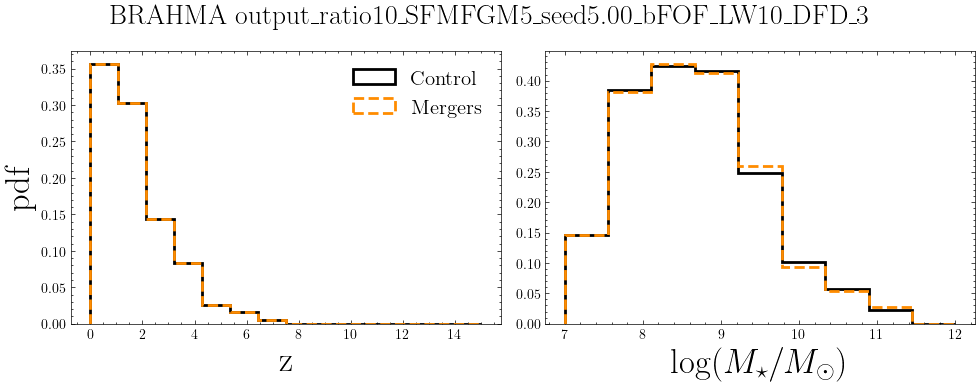

In [182]:
Mstar_binsize = 0.5
Mstar_min = 7
Mstar_max = 12
Nbins_Ms = int((Mstar_max - Mstar_min) / Mstar_binsize)
Mstar_bins = np.linspace(Mstar_min, Mstar_max, Nbins_Ms)

z_binsize = 1
z_min = 0
z_max = 15
Nbins_z = int((z_max - z_min) / z_binsize)
z_bins = np.linspace(z_min, z_max, Nbins_z )

fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].hist(brahma_pop_Nstar10_bh1['non_merging_population']['z'][:][merger_control_index_pairs[valid_control_available_flag,1]], bins=z_bins, color="black", histtype="step",linewidth=2,density=True,label="Control")
ax[0].set_xlabel("z",fontsize=25)
ax[0].hist(brahma_pop_Nstar10_bh1['merging_population']['z'][:][merger_control_index_pairs[valid_control_available_flag,0]], bins=z_bins, histtype="step",color="Darkorange",linestyle="--",linewidth=2,density=True,label="Mergers")
ax[0].set_ylabel("pdf",fontsize=25)
ax[0].legend(fontsize=15)
#ax[0].set_xticks([0,1,2,3,4,5])

ax[1].hist(np.log10(brahma_pop_Nstar10_bh1['non_merging_population']['Mstar'][:][merger_control_index_pairs[valid_control_available_flag,1]]), bins=Mstar_bins,histtype="step",color="black",label="Control",linewidth=2,density=True)
ax[1].set_xticks([7,8,9,10,11,12])
ax[1].hist(np.log10(brahma_pop_Nstar10_bh1['merging_population']['Mstar'][:][merger_control_index_pairs[valid_control_available_flag,0]]),bins=Mstar_bins,histtype="step",color="Darkorange",linestyle="--",linewidth=2,density=True,label="Mergers")
ax[1].set_xlabel("$\log(M_{\star}/M_{\odot})$",fontsize=25)

fig.suptitle("BRAHMA "+simName,fontsize=20)
fig.tight_layout()
fig.savefig("../figures/control_sample_analysis_w_brahma_galaxy_mergers_"+simName+".pdf",dpi=300)

In [218]:
z_merging_pop = brahma_pop_Nstar10['merging_population']['z'][:][merger_control_index_pairs[valid_control_available_flag,0]]
z_control_pop = brahma_pop_Nstar10['non_merging_population']['z'][:][merger_control_index_pairs[valid_control_available_flag,1]]    


Mstar_merging_pop = brahma_pop_Nstar10['merging_population']['Mstar'][:][merger_control_index_pairs[valid_control_available_flag,0]]
Mstar_control_pop = brahma_pop_Nstar10['non_merging_population']['Mstar'][:][merger_control_index_pairs[valid_control_available_flag,1]]

SFR_merging_pop = brahma_pop_Nstar10['merging_population']['SFR'][:][merger_control_index_pairs[valid_control_available_flag,0]]
SFR_control_pop = brahma_pop_Nstar10['non_merging_population']['SFR'][:][merger_control_index_pairs[valid_control_available_flag,1]]

sSFR_merging_pop = SFR_merging_pop/Mstar_merging_pop
sSFR_control_pop = SFR_control_pop/Mstar_control_pop

MBH_dot_merging_pop = brahma_pop_Nstar10_bh1['merging_population']['Mdot'][:][merger_control_index_pairs[valid_control_available_flag,0]]
MBH_dot_control_pop = brahma_pop_Nstar10_bh1['non_merging_population']['Mdot'][:][merger_control_index_pairs[valid_control_available_flag,1]]

MBH_merging_pop = brahma_pop_Nstar10_bh1['merging_population']['MBH'][:][merger_control_index_pairs[valid_control_available_flag,0]]    
MBH_control_pop = brahma_pop_Nstar10_bh1['non_merging_population']['MBH'][:][merger_control_index_pairs[valid_control_available_flag,1]] 


sBHAR_merging_pop = MBH_dot_merging_pop/MBH_merging_pop
sBHAR_control_pop = MBH_dot_control_pop/MBH_control_pop

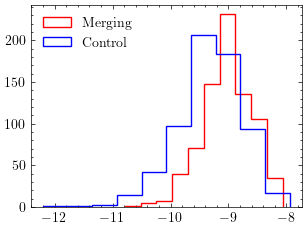

In [219]:
plt.hist(np.log10(sSFR_merging_pop[sSFR_merging_pop>0]),histtype='step',color='red',label='Merging')
plt.hist(np.log10(sSFR_control_pop[sSFR_control_pop>0]),histtype='step',color='blue',label='Control')
# plt.xlabel('log10(sSFR/yr^-1)')
# plt.ylabel('N')
plt.legend()

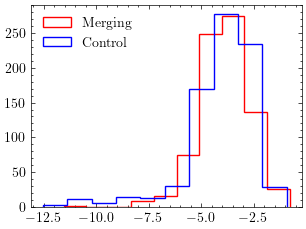

In [220]:
plt.hist(np.log10(MBH_dot_merging_pop[MBH_dot_merging_pop>0]),histtype='step',color='red',label='Merging')
plt.hist(np.log10(MBH_dot_control_pop[MBH_dot_control_pop>0]),histtype='step',color='blue',label='Control')
# plt.xlabel('log10(MBH_dot/Msun/yr)')
# plt.ylabel('N')
plt.legend()

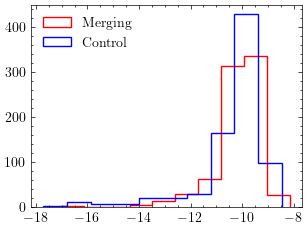

In [221]:
plt.hist(np.log10(sBHAR_merging_pop[sBHAR_merging_pop>0]),histtype='step',color='red',label='Merging')
plt.hist(np.log10(sBHAR_control_pop[sBHAR_control_pop>0]),histtype='step',color='blue',label='Control')
# plt.xlabel('sBHAR')
# plt.ylabel('N')
plt.legend()    

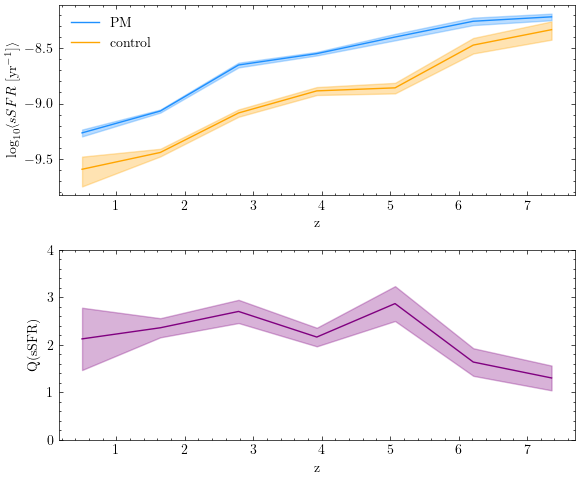

In [199]:
z_min = 0
z_max = 8
z_binsize = 1

Nbins_z = int((z_max - z_min) / z_binsize)
z_bins = np.linspace(z_min, z_max, Nbins_z)

avg_sSFR_control = []
std_sSFR_control = []

avg_sSFR_merger = []
std_sSFR_merger = []

# Loop through redshift bins
for i in range(len(z_bins) - 1):
    # Create masks for merging and control populations within each redshift bin
    merger_z_mask = (z_merging_pop > z_bins[i]) & (z_merging_pop < z_bins[i + 1])
    control_z_mask = (z_control_pop > z_bins[i]) & (z_control_pop < z_bins[i + 1])

    sSFR_merging_pop_filtered = sSFR_merging_pop[merger_z_mask]
    sSFR_control_pop_filtered = sSFR_control_pop[control_z_mask]

    avg_sSFR_merger.append(np.mean(sSFR_merging_pop_filtered))
    std_sSFR_merger.append(np.std(sSFR_merging_pop_filtered) / np.sqrt(len(sSFR_merging_pop_filtered)))

    avg_sSFR_control.append(np.mean(sSFR_control_pop_filtered))
    std_sSFR_control.append(np.std(sSFR_control_pop_filtered) / np.sqrt(len(sSFR_control_pop_filtered)))

avg_sSFR_merger = np.array(avg_sSFR_merger)
std_sSFR_merger = np.array(std_sSFR_merger)

avg_sSFR_control = np.array(avg_sSFR_control)
std_sSFR_control = np.array(std_sSFR_control)

Q_sSFR = avg_sSFR_merger / avg_sSFR_control
Q_sSFR_SE = Q_sSFR * np.sqrt((std_sSFR_merger / avg_sSFR_merger) ** 2 + (std_sSFR_control / avg_sSFR_control) ** 2)

# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(6, 5))
ax[0].plot(z_bins[:-1] + z_binsize / 2, np.log10(avg_sSFR_merger[avg_sSFR_merger > 0]), label='PM', color="dodgerblue")
ax[0].fill_between(z_bins[:-1] + z_binsize / 2, np.log10(avg_sSFR_merger - std_sSFR_merger), np.log10(avg_sSFR_merger + std_sSFR_merger), alpha=0.3, color='dodgerblue')
ax[0].plot(z_bins[:-1] + z_binsize / 2, np.log10(avg_sSFR_control[avg_sSFR_control > 0]), label='control', color='orange')
ax[0].fill_between(z_bins[:-1] + z_binsize / 2, np.log10(avg_sSFR_control - std_sSFR_control), np.log10(avg_sSFR_control + std_sSFR_control), alpha=0.3, color='orange')
ax[0].legend()
ax[0].set_xlabel('z')
ax[0].set_ylabel(r'$\log_{10}\langle sSFR \; [\mathrm{yr}^{-1}]\rangle$')

ax[1].plot(z_bins[:-1] + z_binsize / 2, Q_sSFR, color='purple')
ax[1].fill_between(z_bins[:-1] + z_binsize / 2, Q_sSFR - Q_sSFR_SE, Q_sSFR + Q_sSFR_SE, alpha=0.3, color='purple')
ax[1].set_xlabel('z')
ax[1].set_ylabel('Q(sSFR)')
ax[1].set_ylim(0, 4)

# Final layout adjustments
fig.tight_layout()

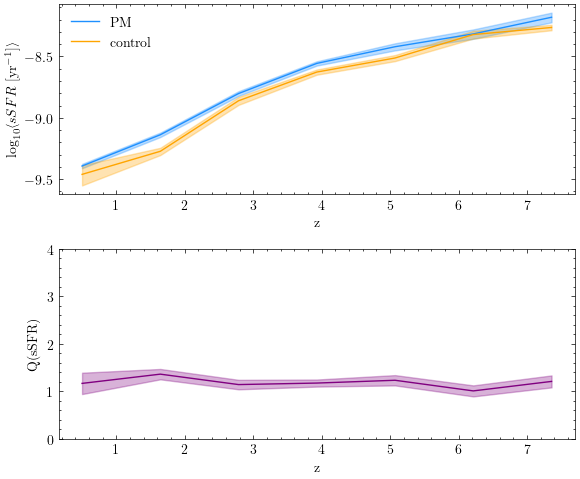

In [33]:
z_min = 0
z_max = 8
z_binsize = 1

Nbins_z = int((z_max - z_min) / z_binsize)
z_bins = np.linspace(z_min, z_max, Nbins_z)

avg_sSFR_control = []
std_sSFR_control = []

avg_sSFR_merger = []
std_sSFR_merger = []

# Loop through redshift bins
for i in range(len(z_bins) - 1):
    # Create masks for merging and control populations within each redshift bin
    merger_z_mask = (z_merging_pop > z_bins[i]) & (z_merging_pop < z_bins[i + 1])
    control_z_mask = (z_control_pop > z_bins[i]) & (z_control_pop < z_bins[i + 1])

    sSFR_merging_pop_filtered = sSFR_merging_pop[merger_z_mask]
    sSFR_control_pop_filtered = sSFR_control_pop[control_z_mask]

    avg_sSFR_merger.append(np.mean(sSFR_merging_pop_filtered))
    std_sSFR_merger.append(np.std(sSFR_merging_pop_filtered) / np.sqrt(len(sSFR_merging_pop_filtered)))

    avg_sSFR_control.append(np.mean(sSFR_control_pop_filtered))
    std_sSFR_control.append(np.std(sSFR_control_pop_filtered) / np.sqrt(len(sSFR_control_pop_filtered)))

avg_sSFR_merger = np.array(avg_sSFR_merger)
std_sSFR_merger = np.array(std_sSFR_merger)

avg_sSFR_control = np.array(avg_sSFR_control)
std_sSFR_control = np.array(std_sSFR_control)

Q_sSFR = avg_sSFR_merger / avg_sSFR_control
Q_sSFR_SE = Q_sSFR * np.sqrt((std_sSFR_merger / avg_sSFR_merger) ** 2 + (std_sSFR_control / avg_sSFR_control) ** 2)

# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(6, 5))
ax[0].plot(z_bins[:-1] + z_binsize / 2, np.log10(avg_sSFR_merger[avg_sSFR_merger > 0]), label='PM', color="dodgerblue")
ax[0].fill_between(z_bins[:-1] + z_binsize / 2, np.log10(avg_sSFR_merger - std_sSFR_merger), np.log10(avg_sSFR_merger + std_sSFR_merger), alpha=0.3, color='dodgerblue')
ax[0].plot(z_bins[:-1] + z_binsize / 2, np.log10(avg_sSFR_control[avg_sSFR_control > 0]), label='control', color='orange')
ax[0].fill_between(z_bins[:-1] + z_binsize / 2, np.log10(avg_sSFR_control - std_sSFR_control), np.log10(avg_sSFR_control + std_sSFR_control), alpha=0.3, color='orange')
ax[0].legend()
ax[0].set_xlabel('z')
ax[0].set_ylabel(r'$\log_{10}\langle sSFR \; [\mathrm{yr}^{-1}]\rangle$')

ax[1].plot(z_bins[:-1] + z_binsize / 2, Q_sSFR, color='purple')
ax[1].fill_between(z_bins[:-1] + z_binsize / 2, Q_sSFR - Q_sSFR_SE, Q_sSFR + Q_sSFR_SE, alpha=0.3, color='purple')
ax[1].set_xlabel('z')
ax[1].set_ylabel('Q(sSFR)')
ax[1].set_ylim(0, 4)

# Final layout adjustments
fig.tight_layout()

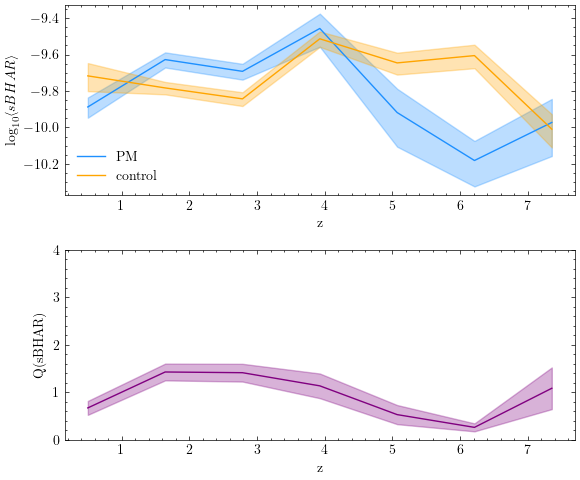

In [222]:
z_min = 0
z_max = 8
z_binsize = 1

Nbins_z = int((z_max - z_min) / z_binsize)
z_bins = np.linspace(z_min, z_max, Nbins_z)

avg_sBHAR_control = []
std_sBHAR_control = []

avg_sBHAR_merger = []
std_sBHAR_merger = []

# Loop through redshift bins
for i in range(len(z_bins) - 1):
    # Create masks for merging and control populations within each redshift bin
    merger_z_mask = (z_merging_pop > z_bins[i]) & (z_merging_pop < z_bins[i + 1])
    control_z_mask = (z_control_pop > z_bins[i]) & (z_control_pop < z_bins[i + 1])

    sBHAR_merging_pop_filtered = sBHAR_merging_pop[merger_z_mask]
    sBHAR_control_pop_filtered = sBHAR_control_pop[control_z_mask]

    avg_sBHAR_merger.append(np.mean(sBHAR_merging_pop_filtered))
    std_sBHAR_merger.append(np.std(sBHAR_merging_pop_filtered) / np.sqrt(len(sBHAR_merging_pop_filtered)))

    avg_sBHAR_control.append(np.mean(sBHAR_control_pop_filtered))
    std_sBHAR_control.append(np.std(sBHAR_control_pop_filtered) / np.sqrt(len(sBHAR_control_pop_filtered)))

avg_sBHAR_merger = np.array(avg_sBHAR_merger)
std_sBHAR_merger = np.array(std_sBHAR_merger)

avg_sBHAR_control = np.array(avg_sBHAR_control)
std_sBHAR_control = np.array(std_sBHAR_control)

Q_sBHAR = avg_sBHAR_merger / avg_sBHAR_control
Q_sBHAR_SE = Q_sBHAR * np.sqrt((std_sBHAR_merger / avg_sBHAR_merger) ** 2 + (std_sBHAR_control / avg_sBHAR_control) ** 2)

# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(6, 5))
ax[0].plot(z_bins[:-1] + z_binsize / 2, np.log10(avg_sBHAR_merger[avg_sBHAR_merger > 0]), label='PM', color="dodgerblue")
ax[0].fill_between(z_bins[:-1] + z_binsize / 2, np.log10(avg_sBHAR_merger - std_sBHAR_merger), np.log10(avg_sBHAR_merger + std_sBHAR_merger), alpha=0.3, color='dodgerblue')
ax[0].plot(z_bins[:-1] + z_binsize / 2, np.log10(avg_sBHAR_control[avg_sBHAR_control > 0]), label='control', color='orange')
ax[0].fill_between(z_bins[:-1] + z_binsize / 2, np.log10(avg_sBHAR_control - std_sBHAR_control), np.log10(avg_sBHAR_control + std_sBHAR_control), alpha=0.3, color='orange')
ax[0].legend()
ax[0].set_xlabel('z')
ax[0].set_ylabel(r'$\log_{10}\langle sBHAR \rangle$')

ax[1].plot(z_bins[:-1] + z_binsize / 2, Q_sBHAR, color='purple')
ax[1].fill_between(z_bins[:-1] + z_binsize / 2, Q_sBHAR - Q_sBHAR_SE, Q_sBHAR + Q_sBHAR_SE, alpha=0.3, color='purple')
ax[1].set_xlabel('z')
ax[1].set_ylabel('Q(sBHAR)')
ax[1].set_ylim(0, 4)

# Final layout adjustments
fig.tight_layout()